In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd


from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




df = pd.read_csv('data.csv')
print(df.head(10))
print("*"*40)
print(df.info())
df.shape

   type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  INFJ  'No, I can't draw on my own nails (haha). Thos...   
2  INFJ  I'm not sure, that's a good question. The dist...   
3  INFJ  'One time my parents were fighting over my dad...   
4  INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...   
5  INFJ  'some of these both excite and calm me:  BUTTS...   
6  INFJ  'I fully believe in the power of being a prote...   
7  INFJ  'It is very annoying to be misinterpreted. Esp...   
8  INFJ  'I think that that can absolutely be true of i...   
9  INFJ  it could be pyroluria.. you know.. it is an on...   

                                        process_post  
0  moment top ten play what ha life experience li...  
1  no ca draw nail done professional nail yes gel...  
2  sure good question distinction two perception ...  
3  one time parent fighting dad affair dad fall b...  
4  joe sure type yet you know re heavy fi 

(1418, 3)

In [2]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  INFJ  'No, I can't draw on my own nails (haha). Thos...   
2  INFJ  I'm not sure, that's a good question. The dist...   
3  INFJ  'One time my parents were fighting over my dad...   
4  INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...   

                                        process_post  words_per_comment  
0  moment top ten play what ha life experience li...              11.12  
1  no ca draw nail done professional nail yes gel...              26.58  
2  sure good question distinction two perception ...              14.76  
3  one time parent fighting dad affair dad fall b...              29.08  
4  joe sure type yet you know re heavy fi doe mak...              25.00  


In [3]:
words = ['actually','intimate','valuation','contract','jar','hack','govern','depress']
target = ['I','E','N','S','T','F','J','P']

for w in range(len(words)):
    df[words[w]+'_per_comment'] =  df['process_post'].apply(lambda x: x.count(words[w]))
df.head()

,type,posts,process_post,words_per_comment,actually_per_comment,intimate_per_comment,valuation_per_comment,contract_per_comment,jar_per_comment,hack_per_comment,govern_per_comment,depress_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,moment top ten play what ha life experience li...,11.12,0,0,0,0,0,0,0,0
1,INFJ,"'No, I can't draw on my own nails (haha). Thos...",no ca draw nail done professional nail yes gel...,26.58,2,0,0,0,0,0,0,0
2,INFJ,"I'm not sure, that's a good question. The dist...",sure good question distinction two perception ...,14.76,0,0,0,0,0,0,0,2
3,INFJ,'One time my parents were fighting over my dad...,one time parent fighting dad affair dad fall b...,29.08,3,0,0,0,0,0,0,0
4,INFJ,'Joe santagato - ENTP|||ENFJ or ENTP? I'm n...,joe sure type yet you know re heavy fi doe mak...,25.00,0,0,0,0,0,0,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

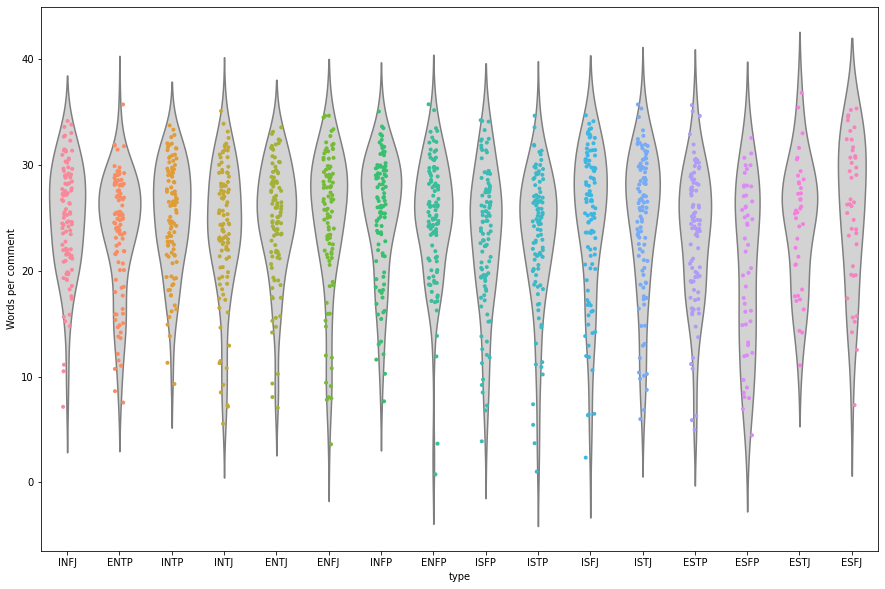

In [5]:

plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

C:\Users\Jugal\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Jugal\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Jugal\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Jugal\anaconda3\lib\site-packages\matplotlib\contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Jugal\anaconda3\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Jugal\anaconda3\lib\site-packages\matplotlib

<Figure size 1080x720 with 0 Axes>

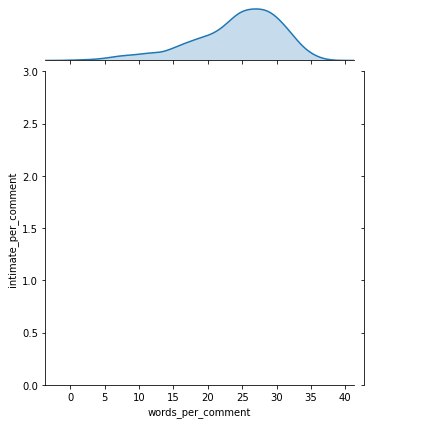

In [6]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='intimate_per_comment', data=df, kind='kde')

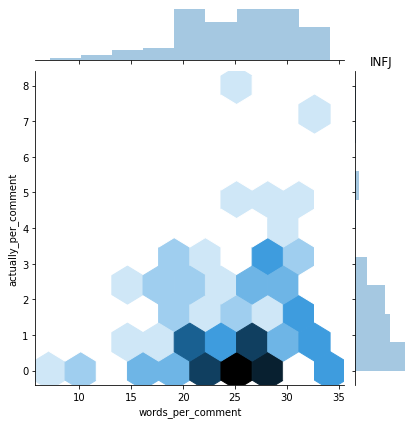

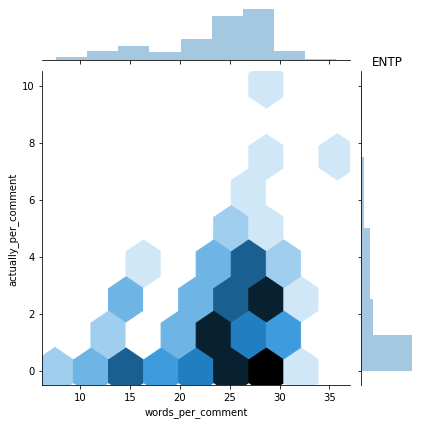

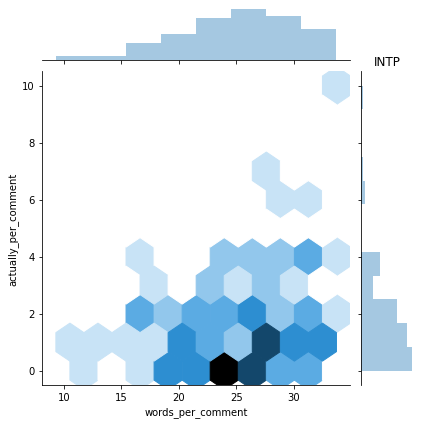

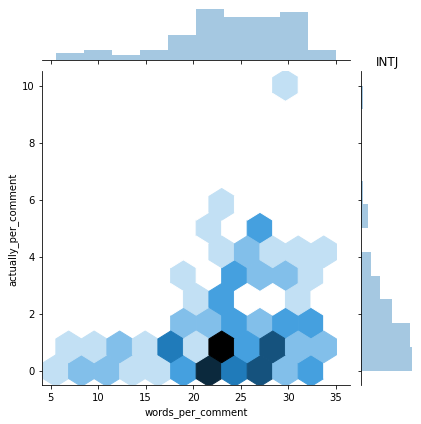

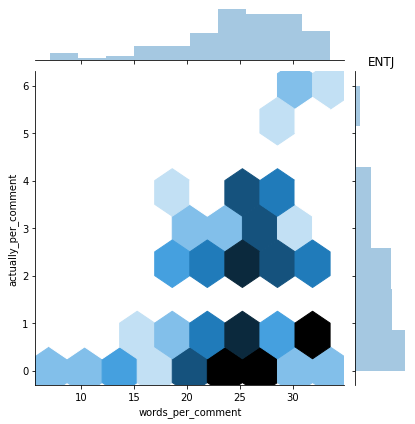

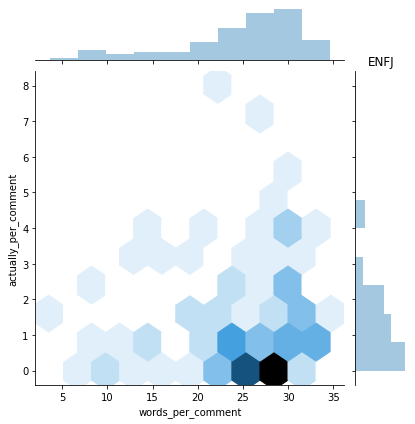

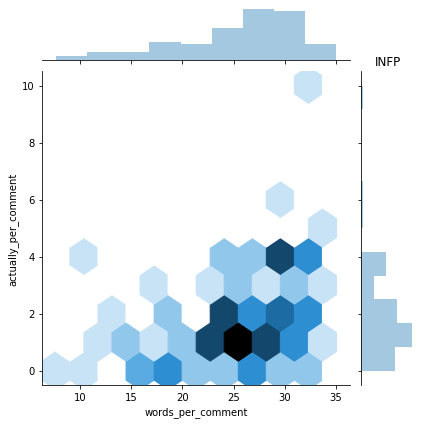

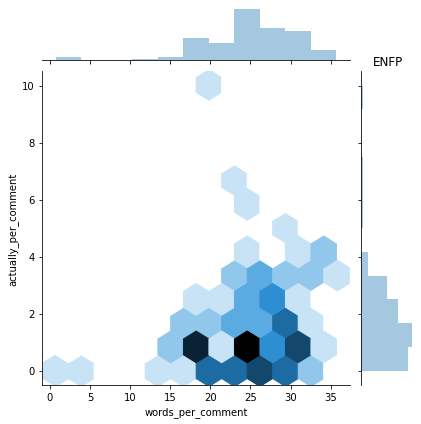

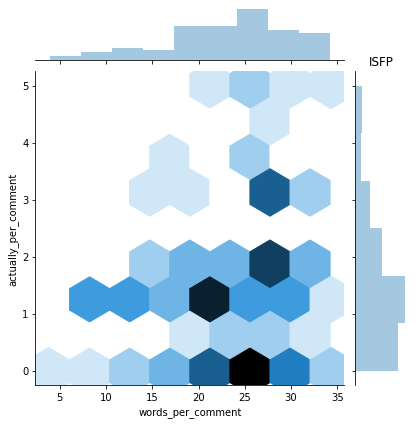

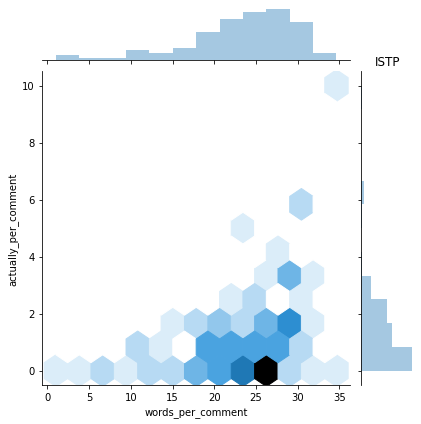

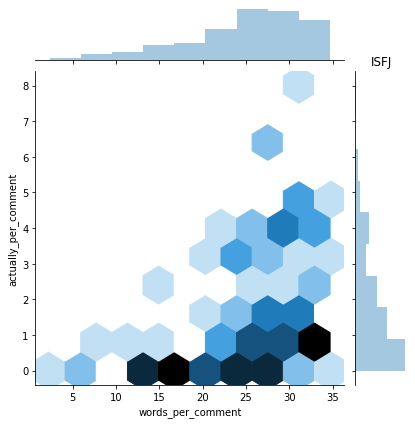

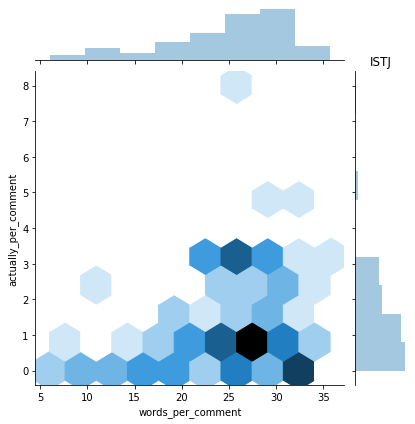

In [16]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='actually_per_comment', data=df_2, kind="hex")
        plt.title(i[k])        
        plt.savefig(i[k]+'.pdf')
        k+=1

In [8]:
for w in range(len(words)):
    df2 = df.loc[df[words[w]+'_per_comment'] > 0]
    print(target[w],words[w],len(df2))

I actually 938
E intimate 33
N valuation 19
S contract 15
T jar 13
F hack 15
J govern 57
P depress 278


In [9]:
df.shape

(1418, 12)

In [10]:
X = df.drop(['type','posts','process_post'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

(1418,)
(1418, 9)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)
print("X-train",X_train.shape)
print("y-train",y_train.shape)
print("X-test",X_test.shape)
print("y-test",y_test.shape)

X-train (1276, 9)
y-train (1276,)
X-test (142, 9)
y-test (142,)


In [12]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random,2,), "%")

92.79 %


In [13]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

# Y_pred = logreg.predict(X_test)
# logreg.score(X_train, y_train)

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

39.81 %


In [15]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

7.29 %
